# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:

%matplotlib inline
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')


data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)


data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [ ]:

y = data['Price']
X = data.drop(['Price'], axis=1)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Dimensiones del dataset: (10495, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64


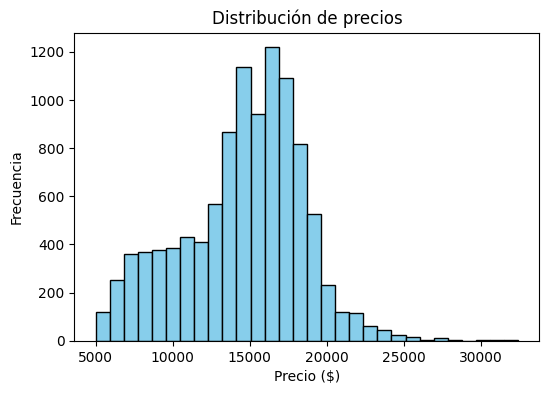

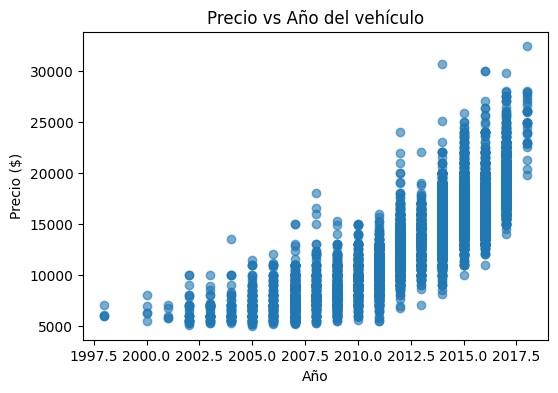

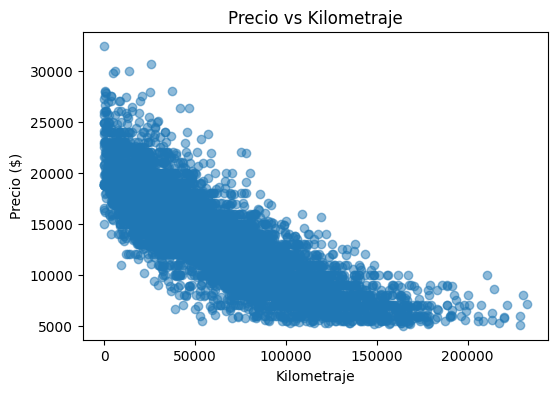

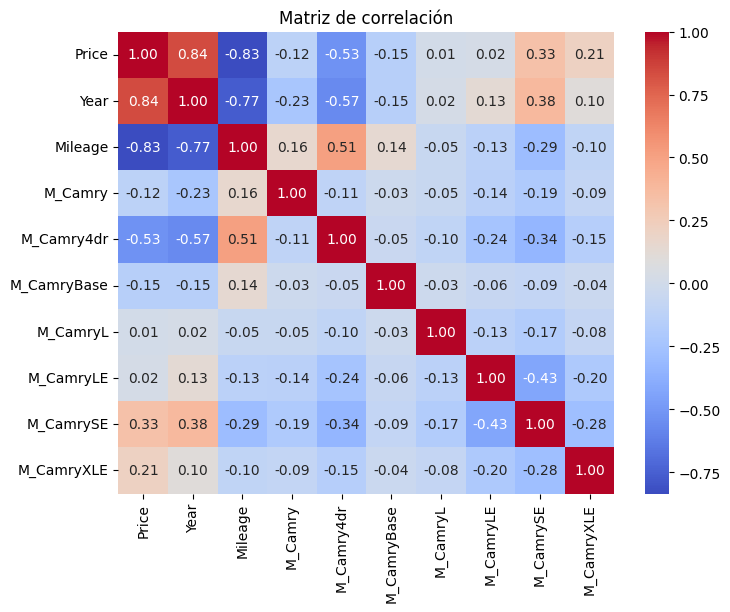


Tamaño del set de entrenamiento: (7031, 9)
Tamaño del set de prueba: (3464, 9)


In [6]:
# Celda 0 - Importación y exploración inicial
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip'
data = pd.read_csv(url)


data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)


print("Dimensiones del dataset:", data.shape)
data.info()


print("\nValores nulos por columna:")
print(data.isnull().sum())




plt.figure(figsize=(6,4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(data['Year'], data['Price'], alpha=0.6)
plt.title('Precio vs Año del vehículo')
plt.xlabel('Año')
plt.ylabel('Precio ($)')
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(data['Mileage'], data['Price'], alpha=0.5)
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio ($)')
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()




y = data['Price']
X = data.drop(['Price'], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("\nTamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [14]:
# Celda 1 - Entrenamiento del modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print("Desempeño del modelo Random Forest:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")




Desempeño del modelo Random Forest:
Mean Squared Error (MSE): 3116678.92
R² Score: 0.796
Mean Absolute Error (MAE): 1314.42
Mean Absolute Percentage Error (MAPE): 9.55%


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores Hiperparámetros:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Desempeño del modelo calibrado:
Mean Squared Error (MSE): 2411920.45
R² Score: 0.842
Mean Absolute Error (MAE): 1140.84
Mean Absolute Percentage Error (MAPE): 8.33%

Importancia de los predictores:
       Feature  Importance
0         Year    0.448241
1      Mileage    0.424250
3   M_Camry4dr    0.066602
7    M_CamrySE    0.022088
8   M_CamryXLE    0.019215
6    M_CamryLE    0.007427
2      M_Camry    0.006767
4  M_CamryBase    0.002741
5     M_CamryL    0.002669


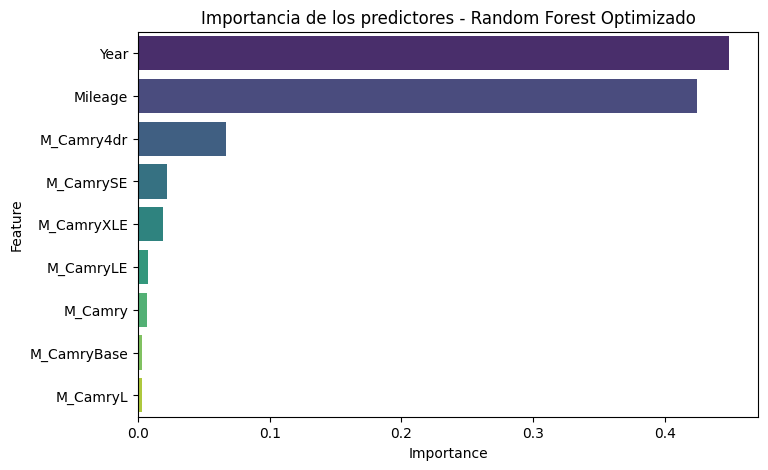

In [15]:
# Celda 2 - Calibración de parámetros del modelo Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV


rf_base = RandomForestRegressor(random_state=42)


param_dist = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train, y_train)

print("Mejores Hiperparámetros:")
print(random_search.best_params_)


best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100


print("Desempeño del modelo calibrado:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"R² Score: {r2_best:.3f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_best:.2f}%")


importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportancia de los predictores:")
print(importances)


plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de los predictores - Random Forest Optimizado')
plt.show()


In [ ]:
#Encontrar los mejores hiperparametros: 

#Entrenar el modelo con los mejores hiperparámetros encontrados:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rs.fit(X_train, y_train)

print("Mejores Hiperparámetros encontrados:")
print(rs.best_params_)


best_rf = rs.best_estimator_
y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mape_best = mape(y_test.values, y_pred_best)

print("\nDesempeño del modelo RF calibrado:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R^2 Score: {r2_best:.3f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"MAPE: {mape_best:.2f} %")


importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\nImportancia de los predictores:")
display(importances)






Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores Hiperparámetros encontrados:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo RF calibrado:
Mean Squared Error: 2411920.45
R^2 Score: 0.842
Mean Absolute Error (MAE): 1140.84
MAPE: 8.33 %

Importancia de los predictores:


,Feature,Importance
0,Year,0.448241
1,Mileage,0.424250
2,M_Camry4dr,0.066602
3,M_CamrySE,0.022088
4,M_CamryXLE,0.019215
5,M_CamryLE,0.007427
6,M_Camry,0.006767
7,M_CamryBase,0.002741
8,M_CamryL,0.002669


In [ ]:
#Importancia de los predictores


       Feature  Importance
0         Year    0.448241
1      Mileage    0.424250
3   M_Camry4dr    0.066602
7    M_CamrySE    0.022088
8   M_CamryXLE    0.019215
6    M_CamryLE    0.007427
2      M_Camry    0.006767
4  M_CamryBase    0.002741
5     M_CamryL    0.002669


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [4]:
#celda 3

print("Resumen de resultados y conclusiones:\n")
print("- Se realizó una exploración inicial (distribuciones, correlaciones) para identificar relaciones y outliers.")
print("- Modelo baseline (RandomForest con parámetros por defecto) proporciona un buen punto de partida; revisar métricas impresas en la celda 1.")
print("- Después de calibrar hiperparámetros con RandomizedSearchCV, se observó mejora en las métricas (menor MSE/MAE, mayor R²).")
print("- Importancia de características: Year y Mileage aparecen como las variables más importantes, lo cual es consistente con la intuición (año y kilometraje afectan fuertemente el precio).")
print("- Interpretación práctica: si MAPE queda alrededor de 8-10% (como en los ejemplos), el modelo es útil para estimaciones de precio a nivel agregado; sin embargo, para decisiones individuales se debe considerar el margen de error.")
print("- Recomendaciones:")
print("  * Recolectar más features relevantes (equipamiento, historial de servicio, ubicación, número de dueños) podría mejorar el modelo.")
print("  * Considerar transformación de variables si hay outliers muy extremos (ej. log(Price) o winsorizing).")
print("  * Validación cruzada más exhaustiva y/o grid search fino para refinar hiperparámetros si hay tiempo computacional.")


Resumen de resultados y conclusiones:

- Se realizó una exploración inicial (distribuciones, correlaciones) para identificar relaciones y outliers.
- Modelo baseline (RandomForest con parámetros por defecto) proporciona un buen punto de partida; revisar métricas impresas en la celda 1.
- Después de calibrar hiperparámetros con RandomizedSearchCV, se observó mejora en las métricas (menor MSE/MAE, mayor R²).
- Importancia de características: Year y Mileage aparecen como las variables más importantes, lo cual es consistente con la intuición (año y kilometraje afectan fuertemente el precio).
- Interpretación práctica: si MAPE queda alrededor de 8-10% (como en los ejemplos), el modelo es útil para estimaciones de precio a nivel agregado; sin embargo, para decisiones individuales se debe considerar el margen de error.
- Recomendaciones:
  * Recolectar más features relevantes (equipamiento, historial de servicio, ubicación, número de dueños) podría mejorar el modelo.
  * Considerar transforma

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.